In [1]:
import tensorflow as tf
import tensorflow.contrib.timeseries as ts
from tensorflow.contrib.timeseries.python.timeseries import NumpyReader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1.5})
%matplotlib inline

/Users/qp19/anaconda2/envs/oreillytf/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#Read the data
train = pd.read_csv('data/AirPassengersTrain.csv')
test = pd.read_csv('data/AirPassengersTest.csv')

In [3]:
#Transform the data into numpy vectors to feed into TF 
x = train.as_matrix(columns=train.columns[0:1])
y = train.as_matrix(columns=train.columns[1:2])
x = x.reshape((120,))

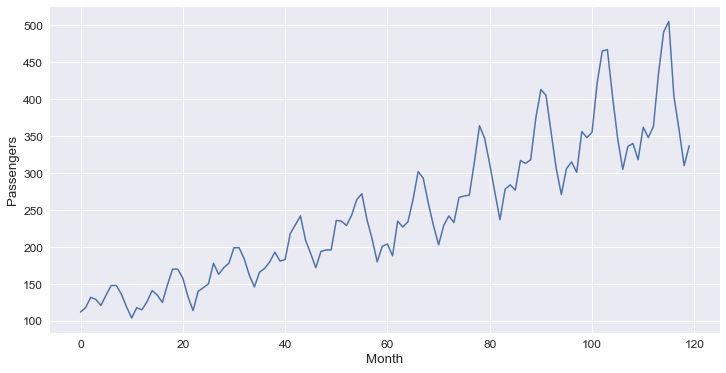

In [4]:
plt.figure(figsize=(12,6))
plt.xlabel('Month')
plt.ylabel('Passengers')
_ = plt.plot(x, y)

In [9]:
#Set the data 
data = {
    ts.TrainEvalFeatures.TIMES: x,
    ts.TrainEvalFeatures.VALUES: y
}

reader = NumpyReader(data)

train_input_fn = ts.RandomWindowInputFn(
        reader, batch_size=24, window_size=24)

In [10]:
estimator = ts.ARRegressor(
      periodicities=[12],
    input_window_size=12,
    output_window_size=12,
    loss=ts.ARModel.NORMAL_LIKELIHOOD_LOSS,
    hidden_layer_sizes=None,num_features=1)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_train_distribute': None, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x127fda810>, '_evaluation_master': '', '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_num_ps_replicas': 0, '_tf_random_seed': None, '_master': '', '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_model_dir': '/var/folders/0x/dj_gdwxs50j09mfgw7kqkg243np59x/T/tmp7a8WL3', '_global_id_in_cluster': 0, '_save_summary_steps': 100}


In [11]:
estimator.train(input_fn=train_input_fn, steps=500)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/0x/dj_gdwxs50j09mfgw7kqkg243np59x/T/tmp7a8WL3/model.ckpt.
INFO:tensorflow:loss = 1.4158044, step = 1
INFO:tensorflow:global_step/sec: 440.337
INFO:tensorflow:loss = 0.11643492, step = 101 (0.229 sec)
INFO:tensorflow:global_step/sec: 693.275
INFO:tensorflow:loss = -0.25836912, step = 201 (0.146 sec)
INFO:tensorflow:global_step/sec: 421.37
INFO:tensorflow:loss = -0.25949585, step = 301 (0.236 sec)
INFO:tensorflow:global_step/sec: 426.532
INFO:tensorflow:loss = -0.5114544, step = 401 (0.234 sec)
INFO:tensorflow:Saving checkpoints for 500 into /var/folders/0x/dj_gdwxs50j09mfgw7kqkg243np59x/T/tmp7a8WL3/model.ckpt.
INFO:tensorflow:Loss for final step: -0.13651061.


In [12]:
eval_input_fn = ts.WholeDatasetInputFn(reader)

In [13]:
evaluation = estimator.evaluate(input_fn=eval_input_fn, steps=1)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-26-03:34:51
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/0x/dj_gdwxs50j09mfgw7kqkg243np59x/T/tmp7a8WL3/model.ckpt-500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-07-26-03:34:51
INFO:tensorflow:Saving dict for global step 500: covariance = [[[ 86.0143  ]
  [ 97.451355]
  [142.19978 ]
  [145.49205 ]
  [143.15497 ]
  [116.55728 ]
  [165.24512 ]
  [180.23972 ]
  [125.581314]
  [123.55944 ]
  [132.88625 ]
  [246.21158 ]
  [ 79.96522 ]
  [ 95.11005 ]
  [134.1529  ]
  [137.65474 ]
  [140.59526 ]
  [118.05421 ]
  [174.65132 ]
  [173.52315 ]
  [124.405914]
  [118.86416 ]
  [118.421135]
  [219.0916  ]
  [ 99.04879 ]
  [131.07547 ]
  [167.91136 ]
  [182.93726 ]
  [174.00496 ]
  [150.24068 ]
  [213.67683 ]
  [198.44872 

In [14]:
def compute_rmse(a, b):
    rmse =  np.sqrt(np.sum(np.square(a - b)) / len(a))
    return round(rmse,5)

def compute_mae(a, b):
    mae =  np.sqrt(np.sum(np.abs(a - b)) / len(a))
    return round(mae,5)

In [15]:
x_current = evaluation['times'][0]
y_current_actual = evaluation['observed'][0].reshape(-1)
y_current_estimated = evaluation['mean'][0].reshape(-1)

rmse = compute_rmse(y_current_actual, y_current_estimated)
mae = compute_mae(y_current_actual, y_current_estimated)
print("Evaluation RMSE {}".format(rmse))
print("Evaluation MAE {}".format(mae))

Evaluation RMSE 17.9163
Evaluation MAE 3.80956


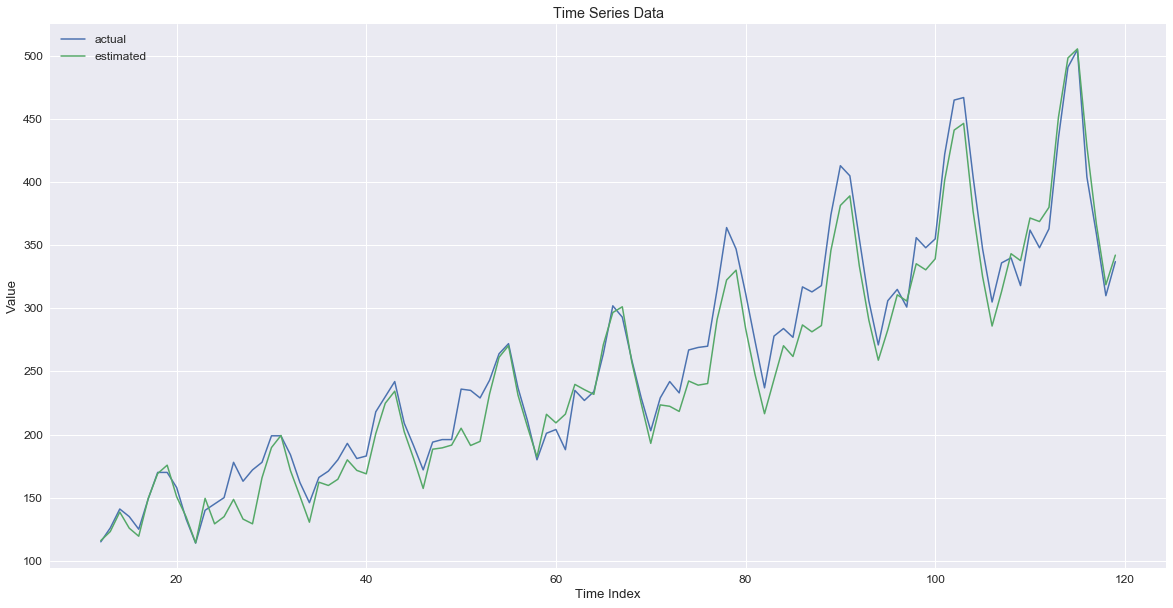

In [16]:
plt.figure(figsize=(20, 10))

plt.title("Time Series Data")
plt.plot(x_current, y_current_actual, label='actual')
plt.plot(x_current, y_current_estimated, label='estimated')
plt.xlabel("Time Index")
plt.ylabel("Value")
plt.legend(loc=2)
plt.show()

In [17]:
#Transform the test data into numpy vectors to feed into TF 
x_test = test.as_matrix(columns=train.columns[0:1])
y_test = test.as_matrix(columns=train.columns[1:2])
x_test = x_test.reshape((24,))

In [18]:
evaluation = estimator.evaluate(input_fn=eval_input_fn, steps=1)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-26-03:35:12
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/0x/dj_gdwxs50j09mfgw7kqkg243np59x/T/tmp7a8WL3/model.ckpt-500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-07-26-03:35:12
INFO:tensorflow:Saving dict for global step 500: covariance = [[[ 86.0143  ]
  [ 97.451355]
  [142.19978 ]
  [145.49205 ]
  [143.15497 ]
  [116.55728 ]
  [165.24512 ]
  [180.23972 ]
  [125.581314]
  [123.55944 ]
  [132.88625 ]
  [246.21158 ]
  [ 79.96522 ]
  [ 95.11005 ]
  [134.1529  ]
  [137.65474 ]
  [140.59526 ]
  [118.05421 ]
  [174.65132 ]
  [173.52315 ]
  [124.405914]
  [118.86416 ]
  [118.421135]
  [219.0916  ]
  [ 99.04879 ]
  [131.07547 ]
  [167.91136 ]
  [182.93726 ]
  [174.00496 ]
  [150.24068 ]
  [213.67683 ]
  [198.44872 

In [19]:
forecasts = estimator.predict(input_fn=ts.predict_continuation_input_fn(evaluation, steps=24))

In [20]:
forecasts = tuple(forecasts)[0]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/0x/dj_gdwxs50j09mfgw7kqkg243np59x/T/tmp7a8WL3/model.ckpt-500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [21]:
forecasts['mean']

array([[356.65674],
       [348.01105],
       [378.3947 ],
       [372.01358],
       [388.7513 ],
       [465.75864],
       [520.61926],
       [524.7217 ],
       [442.86685],
       [374.6112 ],
       [318.60602],
       [347.08423],
       [372.96188],
       [367.65897],
       [403.73114],
       [396.54544],
       [414.473  ],
       [493.96704],
       [551.39417],
       [555.73474],
       [464.76846],
       [392.55603],
       [330.85718],
       [356.37772]], dtype=float32)

In [22]:
forecasts['covariance']

array([[ 366.15668],
       [1027.8618 ],
       [ 533.1951 ],
       [ 810.0729 ],
       [ 753.4918 ],
       [ 937.561  ],
       [1208.4844 ],
       [ 486.18753],
       [ 634.4505 ],
       [ 347.10953],
       [ 378.93332],
       [ 337.72406],
       [ 456.36807],
       [1391.8472 ],
       [ 675.6823 ],
       [1039.5133 ],
       [ 903.5394 ],
       [1237.5901 ],
       [1453.6997 ],
       [ 535.82275],
       [ 754.3607 ],
       [ 408.50012],
       [ 422.20682],
       [ 372.54175]], dtype=float32)

In [23]:
y_forecast = forecasts['mean']
rmse =  compute_rmse(y_test, y_forecast)
mae =  compute_mae(y_test, y_forecast)



In [24]:
rmse

43.85733

In [25]:
mae

6.21457

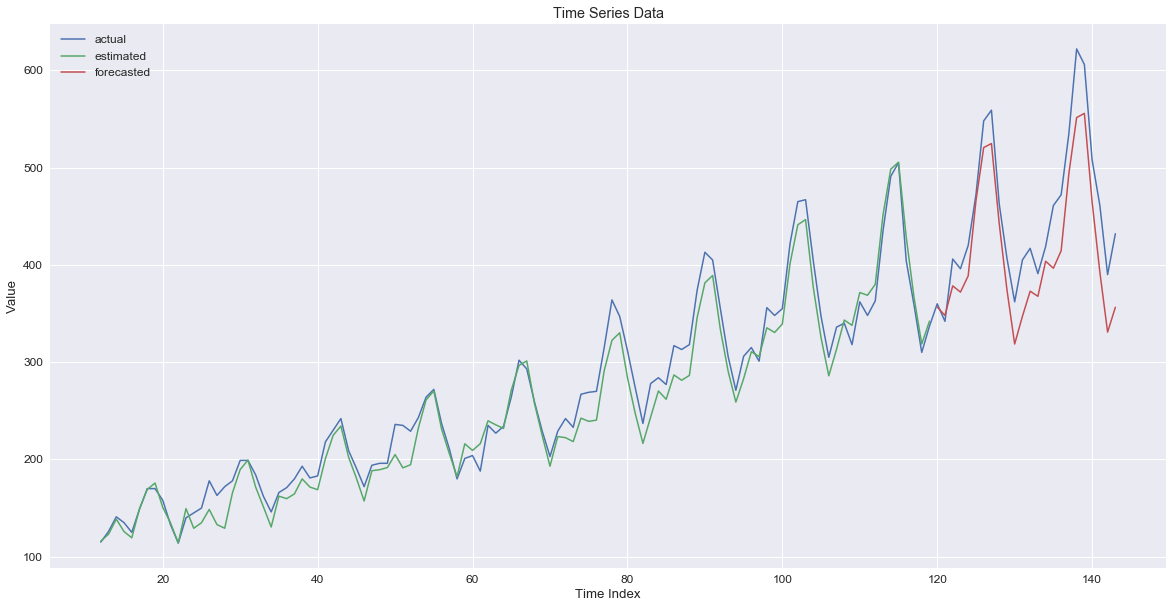

In [26]:
x_all = np.concatenate( (x_current, x_test) , axis=0)
y_actual_all = np.concatenate((y_current_actual, y_test.reshape((24,))), axis=0)

plt.close('all')
plt.figure(figsize=(20, 10))

plt.title("Time Series Data")
plt.plot(x_all, y_actual_all, label='actual')
plt.plot(x_current, y_current_estimated, label='estimated')
plt.plot(x_test, y_forecast, label='forecasted')
plt.xlabel("Time Index")
plt.ylabel("Value")
plt.legend(loc=2)
plt.show()